In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 🧠 Alzheimer Risk Prediction - Machine Learning Project


<details>
<summary>📌 Project Overview</summary>
This project aims to predict the risk of Alzheimer's disease using machine learning techniques, specifically logistic regression implemented in PyTorch. The work follows the theoretical and practical foundations provided during the *PPGEEC2318 - Machine Learning* course.

We will go through the full pipeline of a machine learning project, from data exploration to model evaluation and final presentation. As a bonus, a simple interactive interface using Streamlit will be developed to allow predictions based on user-provided patient information.
</details>

<details>
<summary>📂 Dataset Description</summary>

The dataset used in this project was obtained from the following public GitHub repository:

🔗 https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset

The dataset is structured in CSV format and contains synthetic data related to various health, demographic, and lifestyle indicators of patients aged 60 to 90 years. Below is the dictionary of the dataset:

- **PatientID**: Unique patient identifier (4751 to 6900)
- **Age**: Age (60–90)
- **Sex**: 0 = Male, 1 = Female
- **Ethnicity**: 0 = Caucasian, 1 = African American, 2 = Asian, 3 = Other
- **Education Level**: 0 = None, 1 = High School, 2 = Bachelor, 3 = Higher Education
- **BMI**: Body Mass Index (15–40)
- **Smoking**: 0 = No, 1 = Yes
- **Alcohol Consumption**: Weekly units (0–20)
- **Physical Activity**: Weekly hours (0–10)
- **DietQuality**: Diet quality score (0–10)
- **SleepQuality**: Sleep quality score (4–10)
- **Family History of Alzheimer’s**: 0 = No, 1 = Yes
- **Cardiovascular Disease**: 0 = No, 1 = Yes
- **Diabetes**: 0 = No, 1 = Yes
- **Depression**: 0 = No, 1 = Yes
- **Head Trauma**: 0 = No, 1 = Yes
- **Hypertension**: 0 = No, 1 = Yes
- **Systolic BP**: 90–180 mmHg
- **Diastolic BP**: 60–120 mmHg
- **Total Cholesterol**: 150–300 mg/dL
- **LDL Cholesterol**: 50–200 mg/dL
- **HDL Cholesterol**: 20–100 mg/dL
- **Triglycerides**: 50–400 mg/dL
- **MMSE**: Mini-Mental State Examination score (0–30)
- **Functional Assessment**: Score (0–10)
- **MemoryComplaints**: 0 = No, 1 = Yes
- **BehavioralProblems**: 0 = No, 1 = Yes
- **ADL**: Activities of Daily Living score (0–10)
- **Confusion**: 0 = No, 1 = Yes
- **Disorientation**: 0 = No, 1 = Yes
- **PersonalityChanges**: 0 = No, 1 = Yes
- **DifficultyCompletingTasks**: 0 = No, 1 = Yes
- **Forgetfulness**: 0 = No, 1 = Yes
- **Diagnosis**: Target label — 0 = No Alzheimer’s, 1 = Alzheimer’s
- **DoctorInCharge**: Contains confidential data ("XXXConfid") and will be ignored.
</details>

<details>
<summary>🔍 Project Workflow</summary>

The following steps will be followed in this notebook:

1. **Exploratory Data Analysis (EDA)**  
   Analyze data distribution, detect missing values, and check for class imbalance.

2. **Data Cleaning and Feature Engineering**  
   Impute or remove missing values, encode categorical variables, and normalize numerical features.

3. **Model Implementation in PyTorch**  
   Create a logistic regression model using PyTorch, based on the base class provided in class.

4. **Model Training**  
   Split the dataset into training and test sets, define the optimizer, train the model over several epochs.

5. **Model Evaluation**  
   Evaluate the model using appropriate metrics such as accuracy, precision, recall, and visualize results.

6. **Documentation of Results**  
   Present results in an organized way using charts, tables, and analysis.

7. **Bonus: Streamlit Interface**  
   A simple web app will be created using Streamlit to allow users to input patient data and receive a prediction.
</details>

Let’s begin! 🚀


In [60]:
import pandas as pd

FILE_PATH = '/content/drive/MyDrive/Mestrado/PPGEEC2318 - APRENDIZADO DE MÁQUINA - T01 (2025.1 - 4T1234)/Projeto 1: Alzheimer Risk Prediction - Machine Learning Project/raw_alzheimers_disease_data.csv'

df = pd.read_csv(FILE_PATH)


## 🔍 Exploratory Data Analysis (EDA)

In this section, we will explore the dataset to better understand its structure and contents. The objectives are:

- Identify the type and range of features
- Check for class imbalance in the target variable
- Analyze statistical properties of the features
- Visualize data distributions and correlations


In [61]:
print(f"Dataset shape: {df.shape}")
df.head()


Dataset shape: (2149, 35)


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [62]:
# Data types and missing values
df.info()

# Total missing values por coluna
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

,0


In [63]:
# Descriptive statistics for numerical features
df.describe()


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


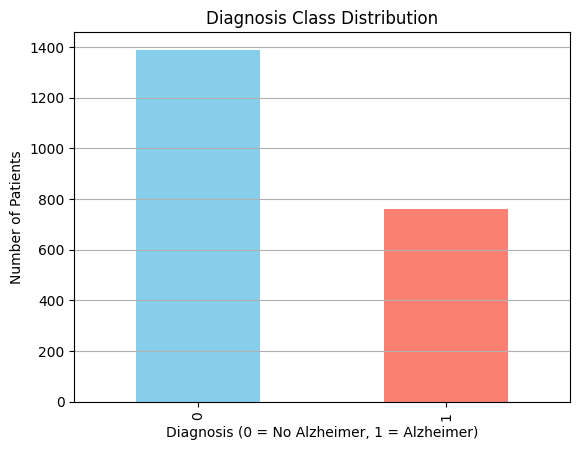

Proportions:
Diagnosis
0    0.646347
1    0.353653
Name: count, dtype: float64


In [64]:
import matplotlib.pyplot as plt

# Class distribution
target_col = 'Diagnosis'
class_counts = df[target_col].value_counts()
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Diagnosis Class Distribution')
plt.xlabel('Diagnosis (0 = No Alzheimer, 1 = Alzheimer)')
plt.ylabel('Number of Patients')
plt.grid(True, axis='y')
plt.show()

# Show proportions
print("Proportions:")
print(class_counts / len(df))


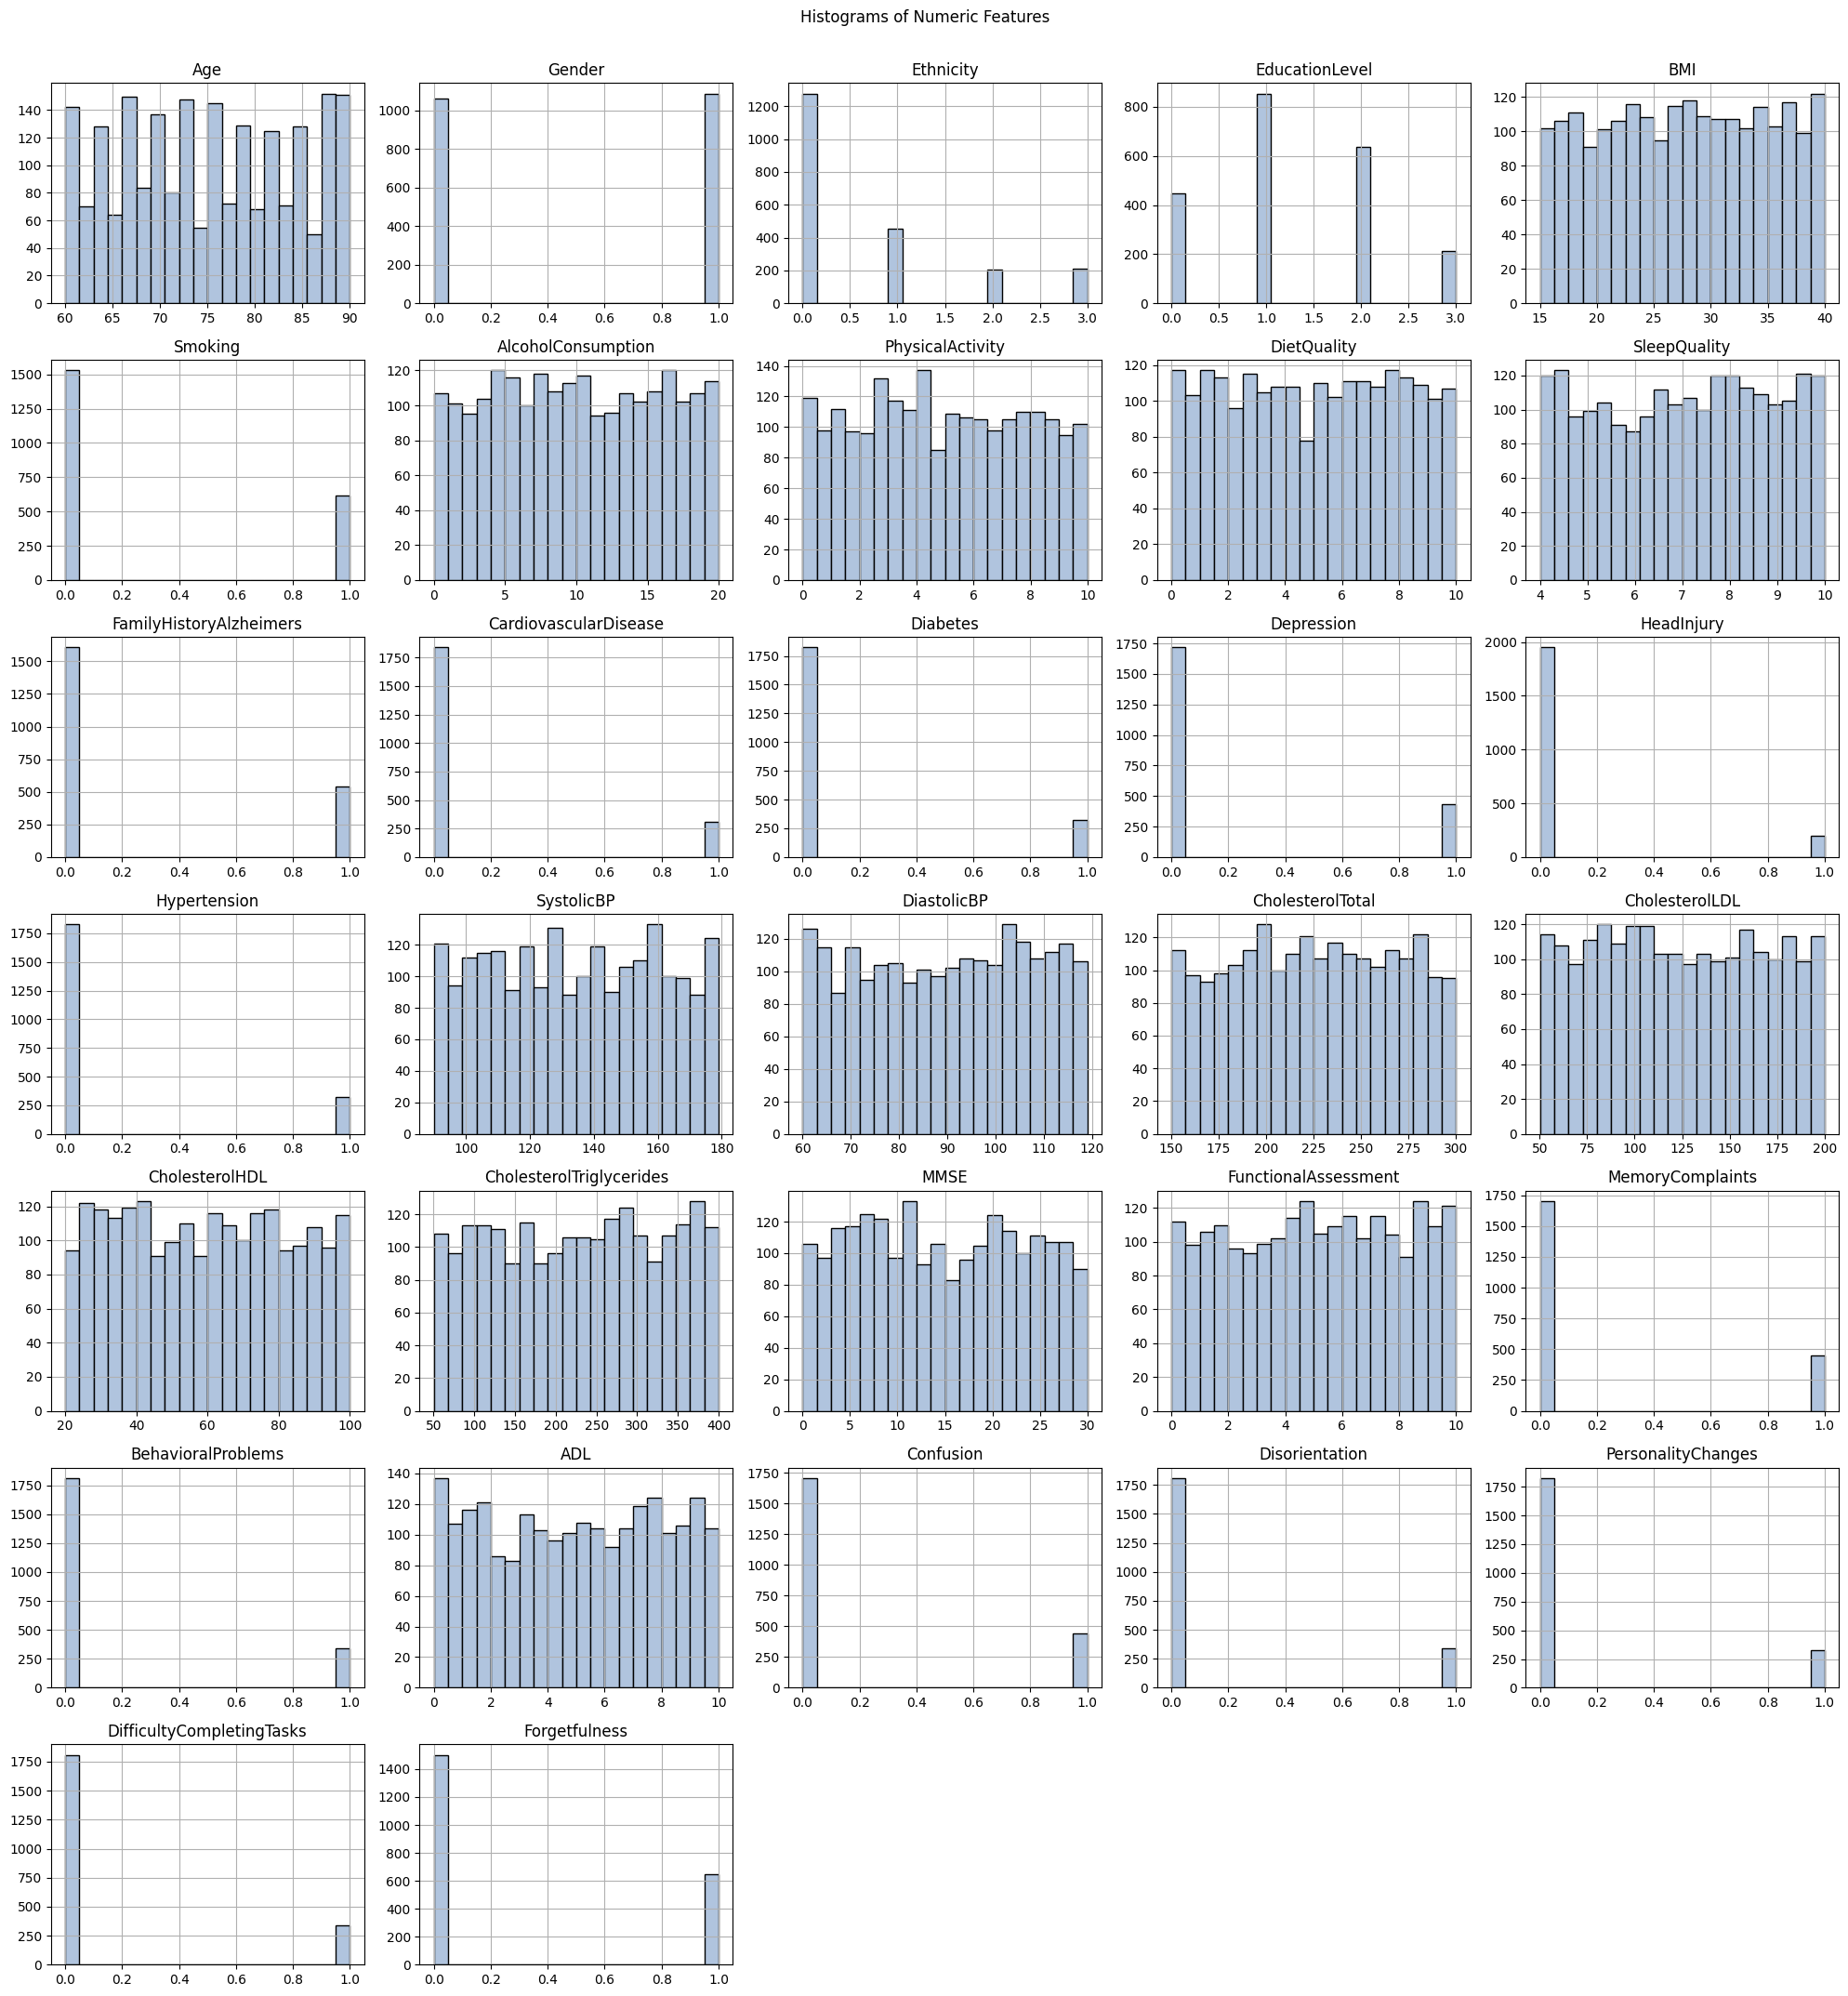

In [65]:
# Select numeric columns excluding ID and Diagnosis
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include='number').columns
numeric_cols = [col for col in numeric_cols if col not in ['PatientID', 'Diagnosis']]

# Adjust layout dynamically based on number of plots
n_cols = 5
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Ceiling division

df[numeric_cols].hist(
    bins=20,
    figsize=(n_cols * 4, n_rows * 3),
    layout=(n_rows, n_cols),
    color='lightsteelblue',
    edgecolor='black'
)

plt.tight_layout()
plt.suptitle('Histograms of Numeric Features', y=1.02)
plt.show()


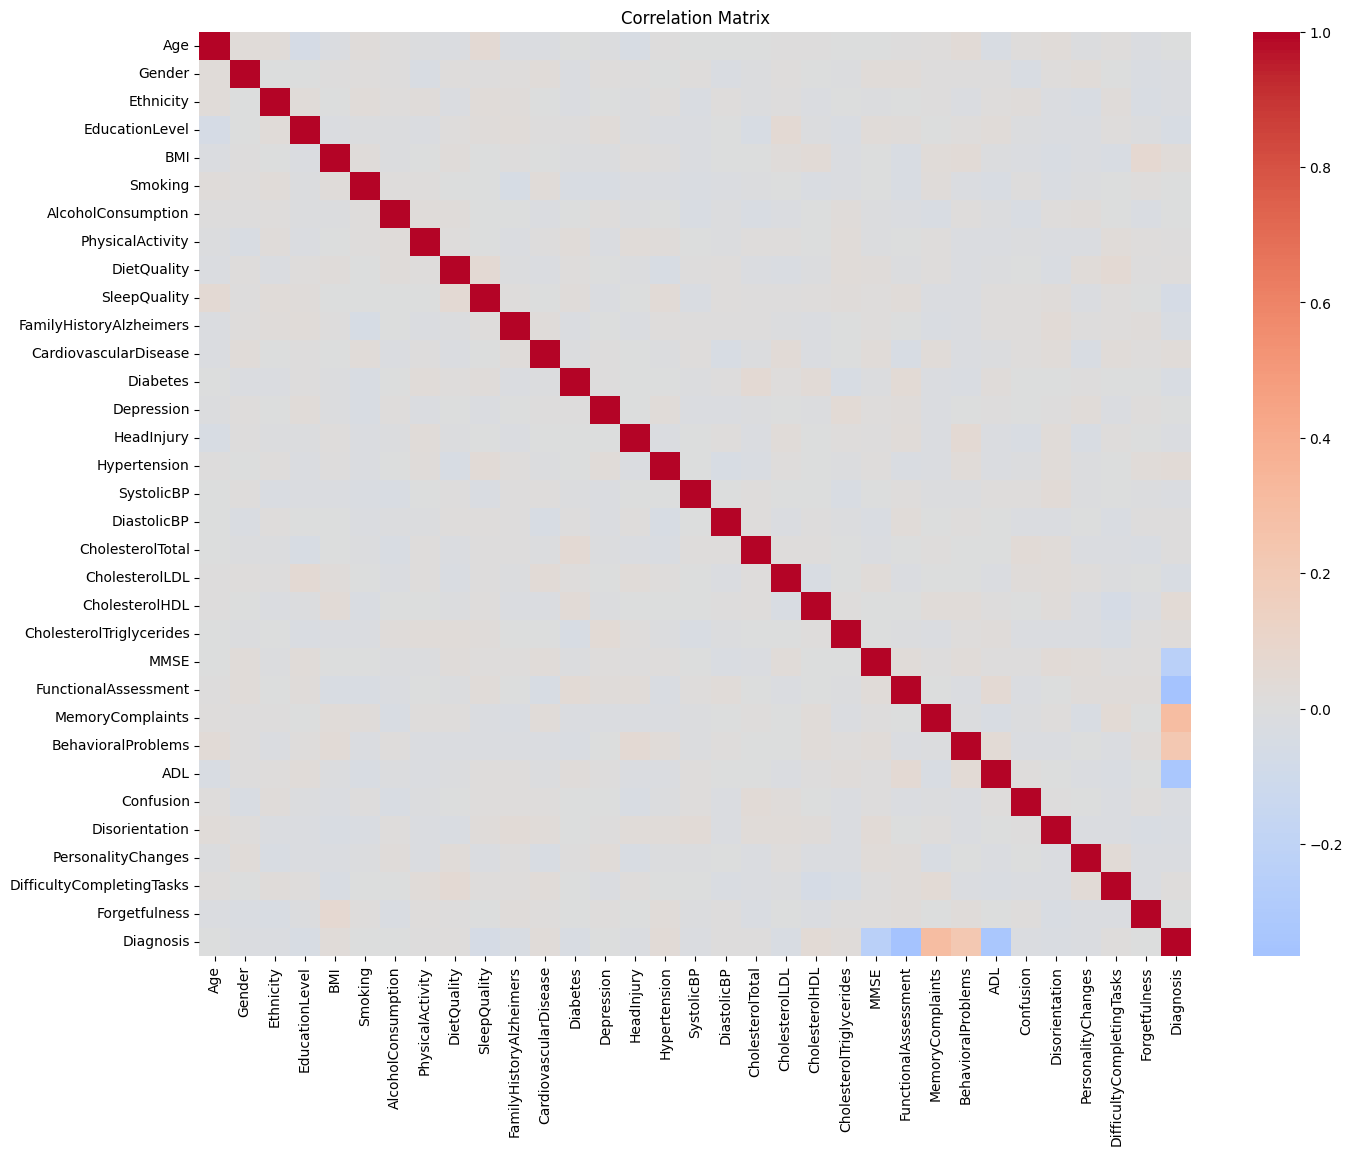

In [66]:
# Correlation matrix
plt.figure(figsize=(16, 12))
corr_matrix = df[numeric_cols + ['Diagnosis']].corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

## 🧹 Data Cleaning and Feature Engineering

In this section, we will clean and prepare the dataset for modeling. Steps include:

- Handling missing values
- Dropping irrelevant or sensitive columns
- Encoding categorical variables
- Normalizing numerical features
- Preparing the final input matrix `X` and target vector `y`


In [67]:
# Drop columns that won't be used for modeling
df_clean = df.drop(columns=['PatientID', 'DoctorInCharge'], errors='ignore')

print(f"Remaining columns: {df_clean.columns.tolist()}")

Remaining columns: ['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']


In [68]:
# Check missing values
missing = df_clean.isnull().sum()
print("Missing values:")
print(missing[missing > 0])

# Drop rows with any missing values
df_clean = df_clean.dropna()

print(f"Dataset shape after dropping rows with missing values: {df_clean.shape}")


Missing values:
Series([], dtype: int64)
Dataset shape after dropping rows with missing values: (2149, 33)


In [69]:
# Corrigir nomes conforme os que realmente existem no dataset
categorical_cols = ['Gender', 'Ethnicity', 'EducationLevel']

print("Categorical columns already encoded as integers:", categorical_cols)

# Mostrar distribuição dos valores
for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df_clean[col].value_counts())


Categorical columns already encoded as integers: ['Gender', 'Ethnicity', 'EducationLevel']

Gender value counts:
Gender
1    1088
0    1061
Name: count, dtype: int64

Ethnicity value counts:
Ethnicity
0    1278
1     454
3     211
2     206
Name: count, dtype: int64

EducationLevel value counts:
EducationLevel
1    854
2    636
0    446
3    213
Name: count, dtype: int64


In [70]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_clean.drop(columns=['Diagnosis'])
y = df_clean['Diagnosis']

# Identify numeric columns to scale
numeric_features = X.select_dtypes(include='number').columns

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numeric_features])

# Convert back to DataFrame for clarity
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_features, index=X.index)

# If there are any non-numeric columns (e.g., encoded categoricals), add them back
X_final = X_scaled_df  # All features are numeric in this dataset

print(f"Final feature matrix shape: {X_final.shape}")


Final feature matrix shape: (2149, 32)


### ✅ Feature Matrix and Target Vector Ready

The dataset has been cleaned and prepared:

- Irrelevant columns removed
- Missing values dropped
- All features are numeric and scaled
- Ready to split into training and test sets

## 🤖 Logistic Regression Model in PyTorch

In this section, we will implement a binary classification model using logistic regression. The model will be built using PyTorch and follow the base structure provided in class.

Steps:

- Define a PyTorch dataset and dataloader
- Implement the logistic regression model using `nn.Module`
- Prepare the loss function and optimizer


In [71]:
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset, DataLoader


X_train, X_test, y_train, y_test = train_test_split(
    X_final.values, y.values, test_size=0.2, random_state=42, stratify=y
)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)


train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [72]:
import torch.nn as nn


class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))


input_dim = X_train.shape[1]
model = LogisticRegressionModel(input_dim)


In [73]:
import torch.optim as optim

# Loss and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)


### ✅ Logistic Regression Model Ready

The logistic regression model has been successfully defined and is ready for training. We used:

- `BCELoss` for binary classification
- `Adam` optimizer
- Input features normalized and prepared


## 🏋️ Model Training

We will now train the logistic regression model using the training data.

Steps:

- Iterate over multiple epochs
- Perform forward pass
- Compute the loss
- Backpropagate the gradients
- Update weights using the optimizer
- Track and print loss over epochs


In [74]:
# Training loop
num_epochs = 100
train_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for X_batch, y_batch in train_loader:
        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")


Epoch [1/100], Loss: 0.7069
Epoch [2/100], Loss: 0.6604
Epoch [3/100], Loss: 0.6208
Epoch [4/100], Loss: 0.5877
Epoch [5/100], Loss: 0.5604
Epoch [6/100], Loss: 0.5370
Epoch [7/100], Loss: 0.5168
Epoch [8/100], Loss: 0.5003
Epoch [9/100], Loss: 0.4864
Epoch [10/100], Loss: 0.4736
Epoch [11/100], Loss: 0.4620
Epoch [12/100], Loss: 0.4531
Epoch [13/100], Loss: 0.4437
Epoch [14/100], Loss: 0.4365
Epoch [15/100], Loss: 0.4297
Epoch [16/100], Loss: 0.4242
Epoch [17/100], Loss: 0.4186
Epoch [18/100], Loss: 0.4144
Epoch [19/100], Loss: 0.4100
Epoch [20/100], Loss: 0.4061
Epoch [21/100], Loss: 0.4015
Epoch [22/100], Loss: 0.3984
Epoch [23/100], Loss: 0.3949
Epoch [24/100], Loss: 0.3927
Epoch [25/100], Loss: 0.3903
Epoch [26/100], Loss: 0.3884
Epoch [27/100], Loss: 0.3871
Epoch [28/100], Loss: 0.3844
Epoch [29/100], Loss: 0.3823
Epoch [30/100], Loss: 0.3812
Epoch [31/100], Loss: 0.3799
Epoch [32/100], Loss: 0.3782
Epoch [33/100], Loss: 0.3765
Epoch [34/100], Loss: 0.3750
Epoch [35/100], Loss: 0

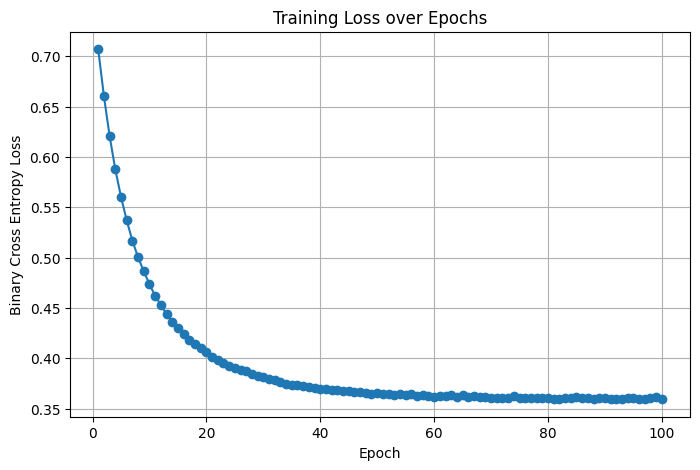

In [75]:
# Plot training loss over epochs
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs+1), train_losses, marker='o')
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Binary Cross Entropy Loss")
plt.grid(True)
plt.show()


### ✅ Training Complete

The logistic regression model has been trained over multiple epochs. The training loss shows how the model improved over time. Next, we will evaluate the model on the test set to analyze its performance.

# 📈 Model Evaluation

We will now evaluate the trained logistic regression model using the test set.

The following metrics will be calculated:

- Accuracy
- Precision
- Recall
- F1-Score
- Confusion Matrix

These metrics will help us understand the model's ability to distinguish between patients with and without Alzheimer's disease.

In [76]:
# Switch to evaluation mode
model.eval()

# Disable gradient tracking
with torch.no_grad():
    y_pred_probs = model(X_test_tensor)
    y_pred = (y_pred_probs >= 0.5).float()


In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert tensors to NumPy arrays
y_true = y_test_tensor.numpy()
y_pred_np = y_pred.numpy()

# Metrics
accuracy = accuracy_score(y_true, y_pred_np)
precision = precision_score(y_true, y_pred_np)
recall = recall_score(y_true, y_pred_np)
f1 = f1_score(y_true, y_pred_np)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")


Accuracy:  0.8186
Precision: 0.7434
Recall:    0.7434
F1-Score:  0.7434


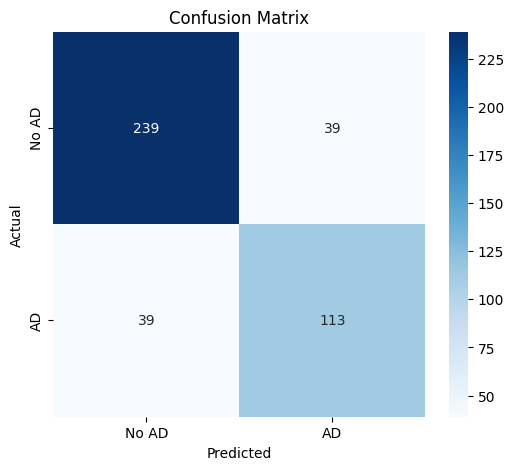

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_np)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No AD', 'AD'], yticklabels=['No AD', 'AD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### ✅ Evaluation Summary

The logistic regression model's performance has been assessed using standard binary classification metrics.

- **Accuracy**: Measures the overall correctness
- **Precision**: How many predicted positives are truly positive
- **Recall**: How many actual positives were correctly predicted
- **F1-score**: Harmonic mean of precision and recall

These metrics, along with the confusion matrix, give us a complete view of how the model performs on unseen data.


In [39]:
import joblib

joblib.dump(model, "logistic_model.pkl")
torch.save(model.state_dict(), "logistic_model_weights.pth")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X_final.columns.tolist(), "features.pkl")

# Salvar uma amostra dos dados para o dashboard
df_clean.to_csv("sample_data.csv", index=False)


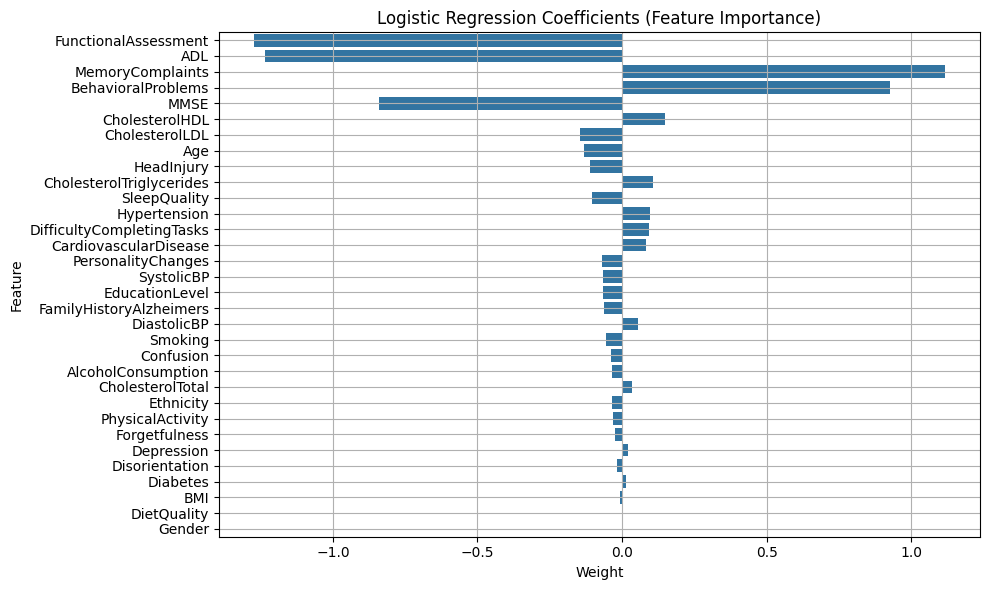

In [87]:
weights = model.linear.weight.detach().numpy().flatten()
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Weight": weights
}).sort_values(by="Weight", key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x="Weight", y="Feature")
plt.title("Logistic Regression Coefficients (Feature Importance)")
plt.grid(True)
plt.tight_layout()
plt.show()
